In [2]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    resized = cv2.resize(crop_img, (size, size), interpolation=interpolation)

    return resized

In [35]:
def predict_digit(image):
  model = load_model("/try_2.h5")
  if(len(image.shape)==3):
    img_gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
  else:
    img_gray = image.copy()
  kernel = np.ones((5, 5), np.uint8)
  img_eroded = cv2.erode(img_gray, kernel, iterations=10)

  ret, mask = cv2.threshold(img_eroded.copy(), 120, 255, cv2.THRESH_BINARY_INV)
  contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  #Getting the contour with maximum area
  c = max(contours, key=cv2.contourArea)
  x,y,w,h = cv2.boundingRect(c)
  #Boundary for visualization
  cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
  #Croppping the thresholded image and adding 50 pixels as padding
  digit = mask[max(y-50, 0):min(y+h+50, image.shape[0]), min(x-50, 0):max(x+w+50, image.shape[1])]
  #Resizing it to match the size of training images
  resized_digit = crop_square(digit, 18)
  padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

  image_to_test = np.array(padded_digit)
  prediction = model.predict(image_to_test.reshape(1, 28, 28, 1))
  plt.imshow(image_to_test.reshape(28, 28), cmap="gray")
  plt.show()
  print("Output predicted by the model:{}".format(np.argmax(prediction)))
  return np.argmax(prediction)

1/1 [==============================] - 0s 52ms/step


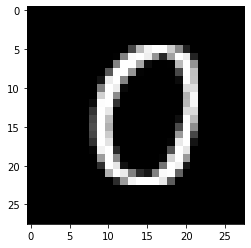

Output predicted by the model:0
i 0 pred 0
1/1 [==============================] - 0s 45ms/step


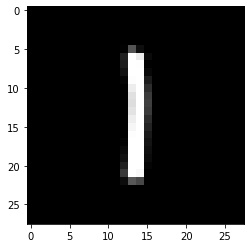

Output predicted by the model:1
i 1 pred 1
1/1 [==============================] - 0s 44ms/step


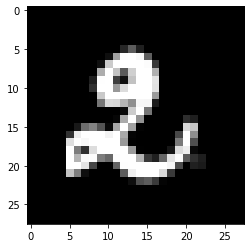

Output predicted by the model:2
i 2 pred 2
1/1 [==============================] - 0s 43ms/step


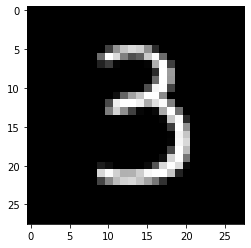

Output predicted by the model:3
i 3 pred 3
1/1 [==============================] - 0s 48ms/step


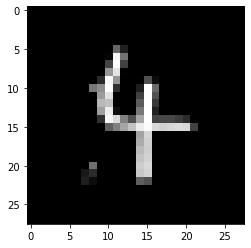

Output predicted by the model:4
i 4 pred 4
1/1 [==============================] - 0s 49ms/step


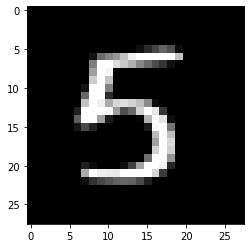

Output predicted by the model:5
i 5 pred 5
1/1 [==============================] - 0s 47ms/step


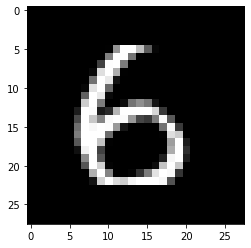

Output predicted by the model:6
i 6 pred 6
1/1 [==============================] - 0s 51ms/step


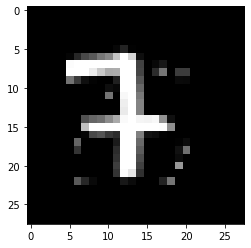

Output predicted by the model:7
i 7 pred 7
1/1 [==============================] - 0s 56ms/step


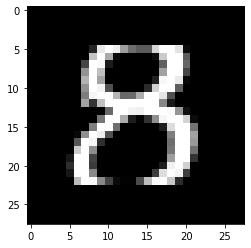

Output predicted by the model:8
i 8 pred 8
1/1 [==============================] - 0s 48ms/step


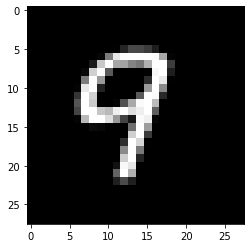

Output predicted by the model:9
i 9 pred 9
CORRECT : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [36]:
correct = []
for i in range(10):
  image = cv2.imread(f'/content/drive/MyDrive/Number_{i}.jpg')
  pred = predict_digit(image)
  print("i", i, "pred", pred)
  if i == pred:
    correct.append(i)
print("CORRECT :", correct)